In [3]:
!python --version

Python 3.8.10


In [4]:
!nvidia-smi

Sat Nov 12 11:30:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.76       Driver Version: 515.76       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:41:00.0 Off |                  N/A |
| 31%   34C    P8    17W / 250W |      0MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---

In [16]:
import os
import numpy as np
from PIL import Image
from PIL import ImageFile
import matplotlib.pyplot as plt

import torch 
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [17]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.MAX_IMAGE_PIXELS = None

In [2]:
datapath = '../dataset/'
os.listdir(datapath)

['1.공인본', '2.삼성본', '3.대구개인본', '4.반야사']

In [3]:
# load image filepath
img_paths = {}
for subfile in os.listdir(datapath):
    subpath = datapath + subfile + '/'
    if subfile not in img_paths.keys():
        img_paths[subfile] = []
    for filename in os.listdir(subpath):
        img_paths[subfile].append(subpath+filename)
        
img_paths

{'1.공인본': ['../dataset/1.공인본/._남명천화상송증도가_공인_2_005 (2).jpg',
  '../dataset/1.공인본/._남명천화상송증도가_공인_2_005.jpg',
  '../dataset/1.공인본/._남명천화상송증도가_공인_2_009.jpg',
  '../dataset/1.공인본/._남명천화상송증도가_공인_2_021.jpg',
  '../dataset/1.공인본/._남명천화상송증도가_공인_2_025.jpg',
  '../dataset/1.공인본/._남명천화상송증도가_공인_2_085.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_001.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_002 (2).jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_002.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_003 (2).jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_003.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_004.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_005 (2).jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_005.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_006.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_007.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_008.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_009.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_010.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_011.jpg',
  '../dataset/1.공인본/남명천화상송증도가_공인_2_012 (2).jpg',
  '../dataset/

In [18]:
class MyDataset(Dataset):
    def __init__(self, imgpath):
        self.label_name = sorted(list(imgpath.keys()))
        self.label = []
        self.data_path = []
        
        for label in self.label_name:
            for path in imgpath[label]:
                self.label.append(self.label2index(label))
                self.data_path.append(path)
    
    def label2index(self, label):
        return self.label_name.index(label)

    def __len__(self):
        return len(self.data_path)

    def __getitem__(self, idx):
        img = Image.open(self.data_path[idx])
        w, h = img.size
        if w > h:
            img = img.crop((w//2 - h//2, 0, w//2 + h//2, h))
        elif w < h:
            img = img.crop((0, h//2 - w//2, w, h//2 + w//2))
        img = img.resize((224, 224))
        img = np.array(img)
        img = img.transpose(2, 0, 1)
        img = torch.from_numpy(img)
        label = self.label[idx]
        return img, label

In [19]:
datast = MyDataset(img_paths)
datald = DataLoader(datast, batch_size=4, shuffle=True)

In [20]:
for i, (img, label) in enumerate(datald):
    print(img.shape, label)
    break

torch.Size([4, 3, 224, 224]) tensor([0, 1, 1, 1])


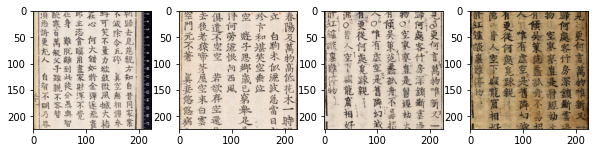

In [22]:
#show image
plt.figure(figsize=(10, 10))

for i, (img, label) in enumerate(datald):
    for j in range(len(img)):
        plt.subplot(4, 4, i*4+j+1)
        plt.imshow(img[j].numpy().transpose(1, 2, 0))
    break